In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [372]:
# Load the data$
root_dir = '../'
linear_torque_cmd_file = root_dir + 'data/sys_id/linear_torque_full.csv'
step_torque_cmd_file = root_dir + 'data/sys_id/step_torque_full.csv'
linear_torque_cmd = pd.read_csv(linear_torque_cmd_file, index_col=0)
step_torque_cmd = pd.read_csv(step_torque_cmd_file, index_col=0)

# First look at the data
linear_torque_cmd.head()

VSI_Motor_Speed_RR  VSI_Motor_Speed_RL  VSI_Motor_Speed_FR  \
0.00                 0.0                 0.0                 0.0   
0.01                 0.0                 0.0                 0.0   
0.02                 0.0                 0.0                 0.0   
0.03                 0.0                 0.0                 0.0   
0.04                 0.0                 0.0                 0.0   

      VSI_Motor_Speed_FL  VSI_TrqFeedback_RR  VSI_TrqFeedback_RL  \
0.00                 0.0             0.00000             0.00000   
0.01                 0.0            -0.12936             0.00000   
0.02                 0.0             0.00000             0.00000   
0.03                 0.0             0.00000            -0.12936   
0.04                 0.0             0.00000             0.00000   

      VSI_TrqFeedback_FR  VSI_TrqFeedback_FL  MISC_Pos_Trq_Limit_RR  \
0.00             0.00000             0.00000                    0.0   
0.01            -0.12936            -0.12936                    0.0   
0.02             0.00000            -0.12936                    0.0   
0.03             0.00000             0.00000                    0.0   
0.04             0.00000            -0.25872                    0.0   

      MISC_Pos_Trq_Limit_RL  MISC_Pos_Trq_Limit_FR  MISC_Pos_Trq_Limit_FL  \
0.00                    0.0                    0.0                    0.0   
0.01                    0.0                    0.0                    0.0   
0.02                    0.0                    0.0                    0.0   
0.03                    0.0                    0.0                    0.0   
0.04                    0.0                    0.0                    0.0   

      MISC_Neg_Trq_Limit_RR  MISC_Neg_Trq_Limit_RL  MISC_Neg_Trq_Limit_FR  \
0.00                    0.0                    0.0                    0.0   
0.01                    0.0                    0.0                    0.0   
0.02                    0.0                    0.0                    0.0   
0.03                    0.0                    0.0                    0.0   
0.04                    0.0                    0.0                    0.0   

      MISC_Neg_Trq_Limit_FL  
0.00                    0.0  
0.01                    0.0  
0.02                    0.0  
0.03                    0.0  
0.04                    0.0

In [373]:
wheel_names = ['FL', 'FR', 'RL', 'RR']
motor_speed_names = [f'VSI_Motor_Speed_{wheel}' for wheel in wheel_names]
speed_names = [f'Wheel_Speed_{wheel}' for wheel in wheel_names]
torque_names = [f'VSI_TrqFeedback_{wheel}' for wheel in wheel_names]
cmd_names = [f'MISC_Pos_Trq_Limit_{wheel}' for wheel in wheel_names]

linear_torque_cmd[cmd_names] /= 0.773
step_torque_cmd[cmd_names] /= 0.773

rpm_to_rad = 2 * np.pi / (60 * 13.18)
linear_torque_cmd[speed_names] = linear_torque_cmd[motor_speed_names].copy() * rpm_to_rad
step_torque_cmd[speed_names] = step_torque_cmd[motor_speed_names].copy() * rpm_to_rad

# torque_names = cmd_names

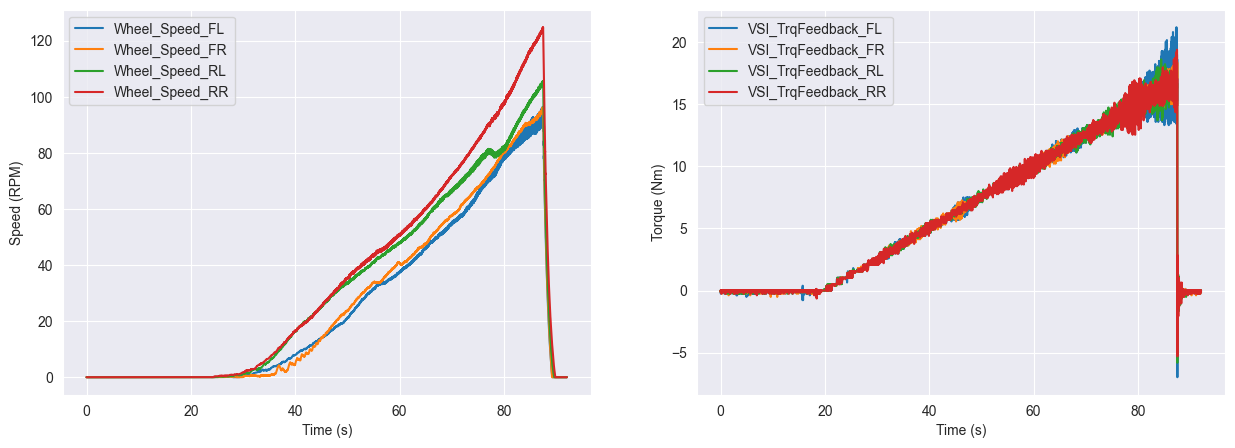

In [374]:
# Plot the linear torque command data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
linear_torque_cmd[speed_names].plot(ax=ax[0], xlabel='Time (s)', ylabel='Speed (RPM)')
linear_torque_cmd[torque_names].plot(ax=ax[1], xlabel='Time (s)', ylabel='Torque (Nm)')
plt.show()

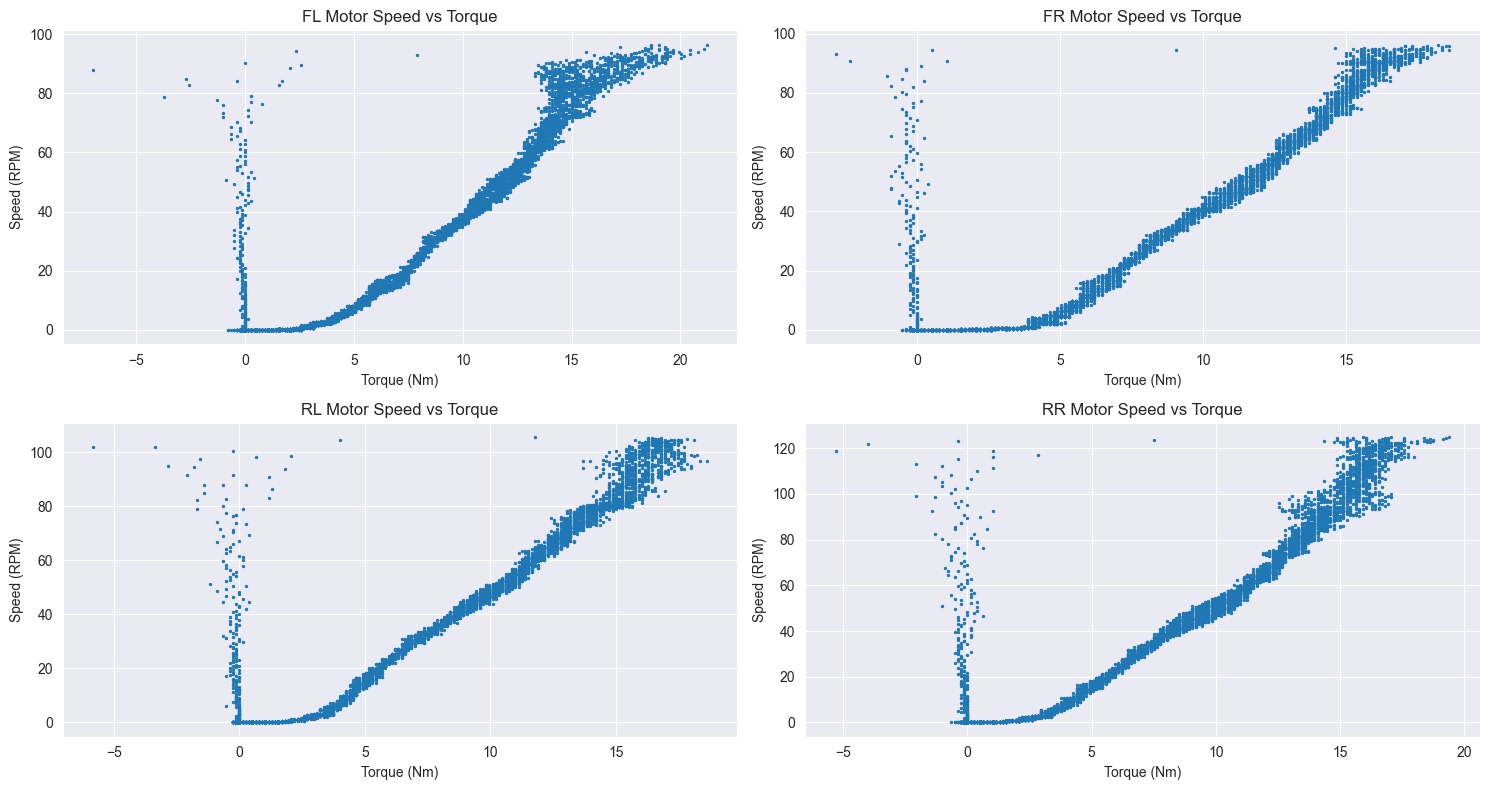

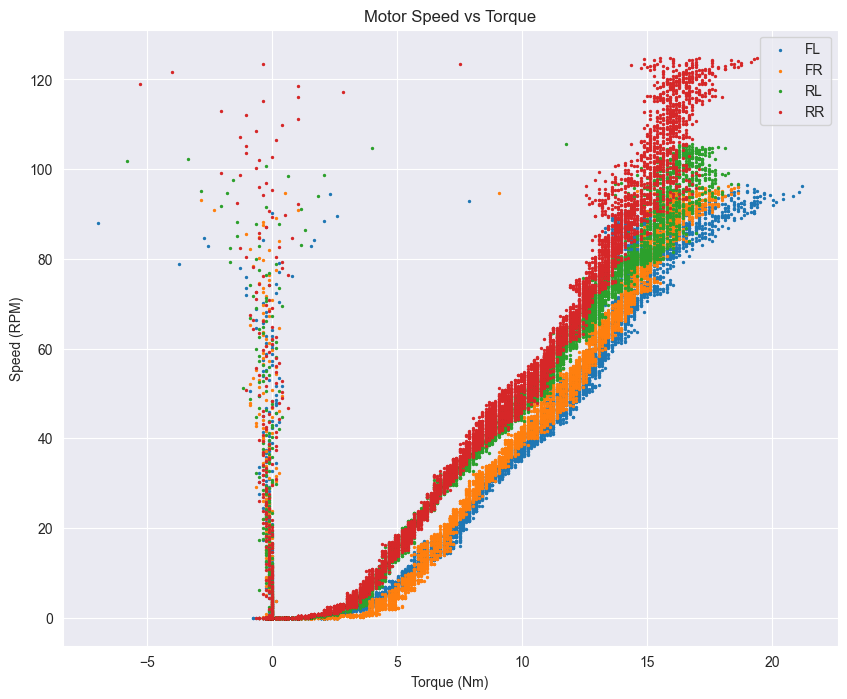

In [375]:
# For each wheel, plot the motor speed vs torque
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, wheel in enumerate(wheel_names):
    ax[i//2, i%2].scatter(linear_torque_cmd[torque_names[i]], linear_torque_cmd[speed_names[i]], s=2)
    ax[i//2, i%2].set_xlabel('Torque (Nm)')
    ax[i//2, i%2].set_ylabel('Speed (RPM)')
    ax[i//2, i%2].set_title(f'{wheel} Motor Speed vs Torque')
plt.tight_layout()

# PLot on a single graph
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i, wheel in enumerate(wheel_names):
    ax.scatter(linear_torque_cmd[torque_names[i]], linear_torque_cmd[speed_names[i]], s=2, label=wheel)
ax.set_xlabel('Torque (Nm)')
ax.set_ylabel('Speed (RPM)')
ax.set_title('Motor Speed vs Torque')
ax.legend()
plt.show()

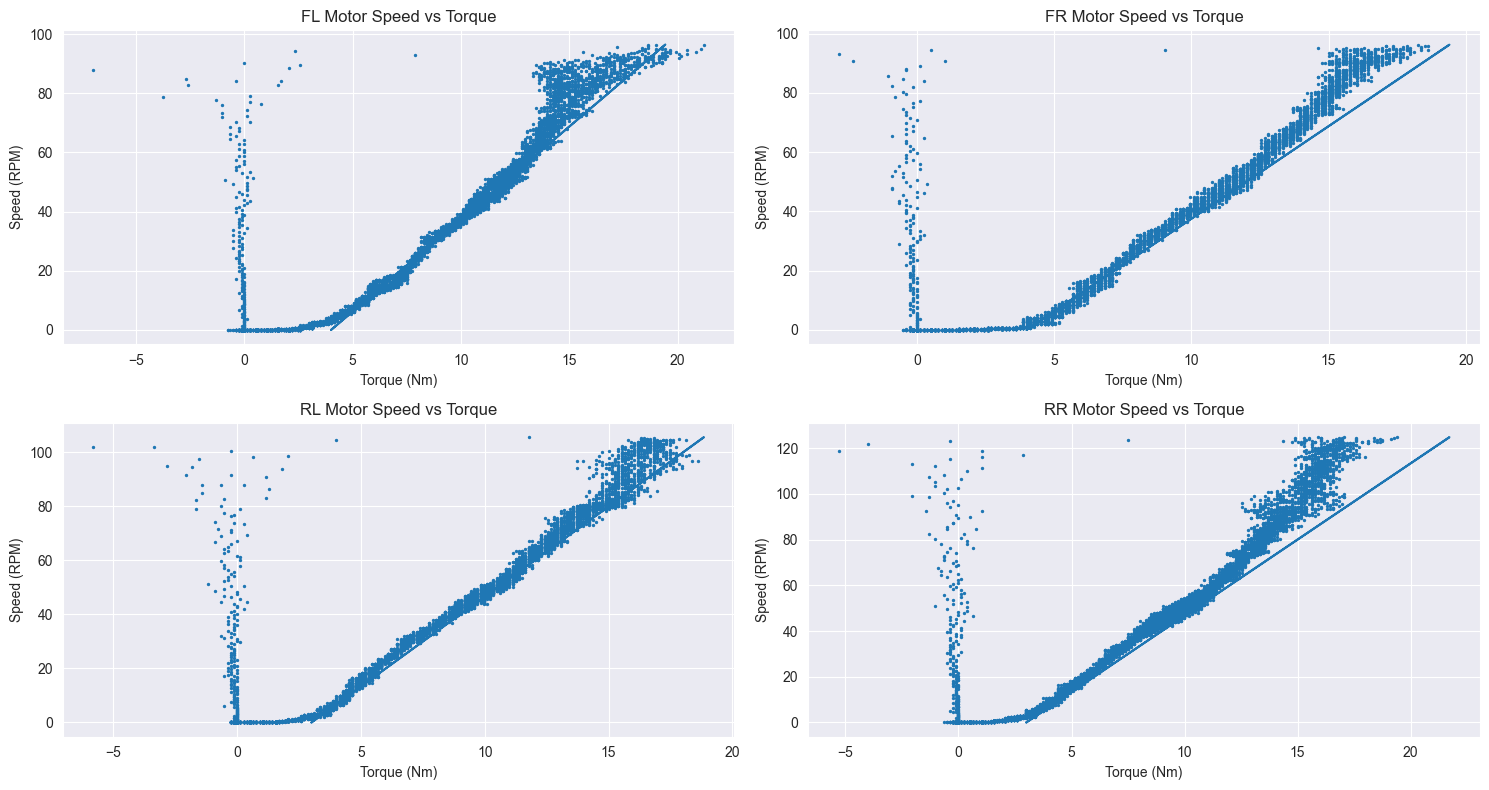

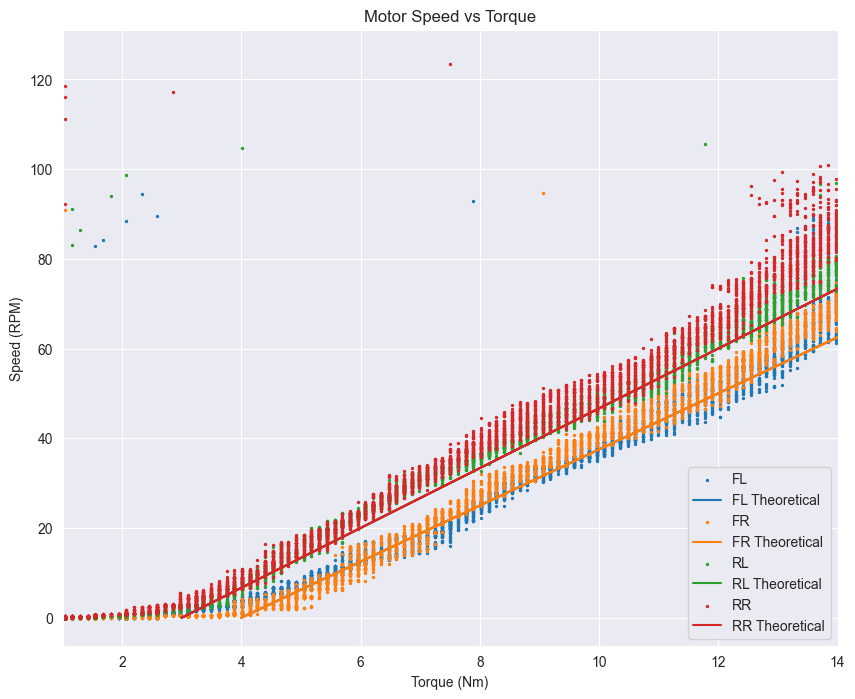

In [376]:
ks_rear = 3
kd_rear = 0.15 
ks_front = 4
kd_front = 0.16

for i, wheel in enumerate(wheel_names):
    if wheel[0] == 'R':
        ks = ks_rear
        kd = kd_rear
    else:
        ks = ks_front
        kd = kd_front
    linear_torque_cmd[f'Theoretical_Torque_{wheel}'] = linear_torque_cmd[speed_names[i]] * kd + ks
    step_torque_cmd[f'Theoretical_Torque_{wheel}'] = step_torque_cmd[speed_names[i]] * kd + ks

# For each wheel, plot the motor speed vs torque
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, wheel in enumerate(wheel_names):
    ax[i//2, i%2].scatter(linear_torque_cmd[torque_names[i]], linear_torque_cmd[speed_names[i]], s=2)
    ax[i//2, i%2].plot(linear_torque_cmd[f'Theoretical_Torque_{wheel}'], linear_torque_cmd[speed_names[i]], label=f'{wheel} Theoretical')
    ax[i//2, i%2].set_xlabel('Torque (Nm)')
    ax[i//2, i%2].set_ylabel('Speed (RPM)')
    ax[i//2, i%2].set_title(f'{wheel} Motor Speed vs Torque')
plt.tight_layout()

# PLot on a single graph
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i, wheel in enumerate(wheel_names):
    ax.scatter(linear_torque_cmd[torque_names[i]], linear_torque_cmd[speed_names[i]], s=2, label=wheel)
    ax.plot(linear_torque_cmd[f'Theoretical_Torque_{wheel}'], linear_torque_cmd[speed_names[i]], label=f'{wheel} Theoretical')
    

ax.set_xlabel('Torque (Nm)')
ax.set_ylabel('Speed (RPM)')
ax.set_title('Motor Speed vs Torque')
ax.set_xlim([1, 14])
ax.legend()
plt.show()

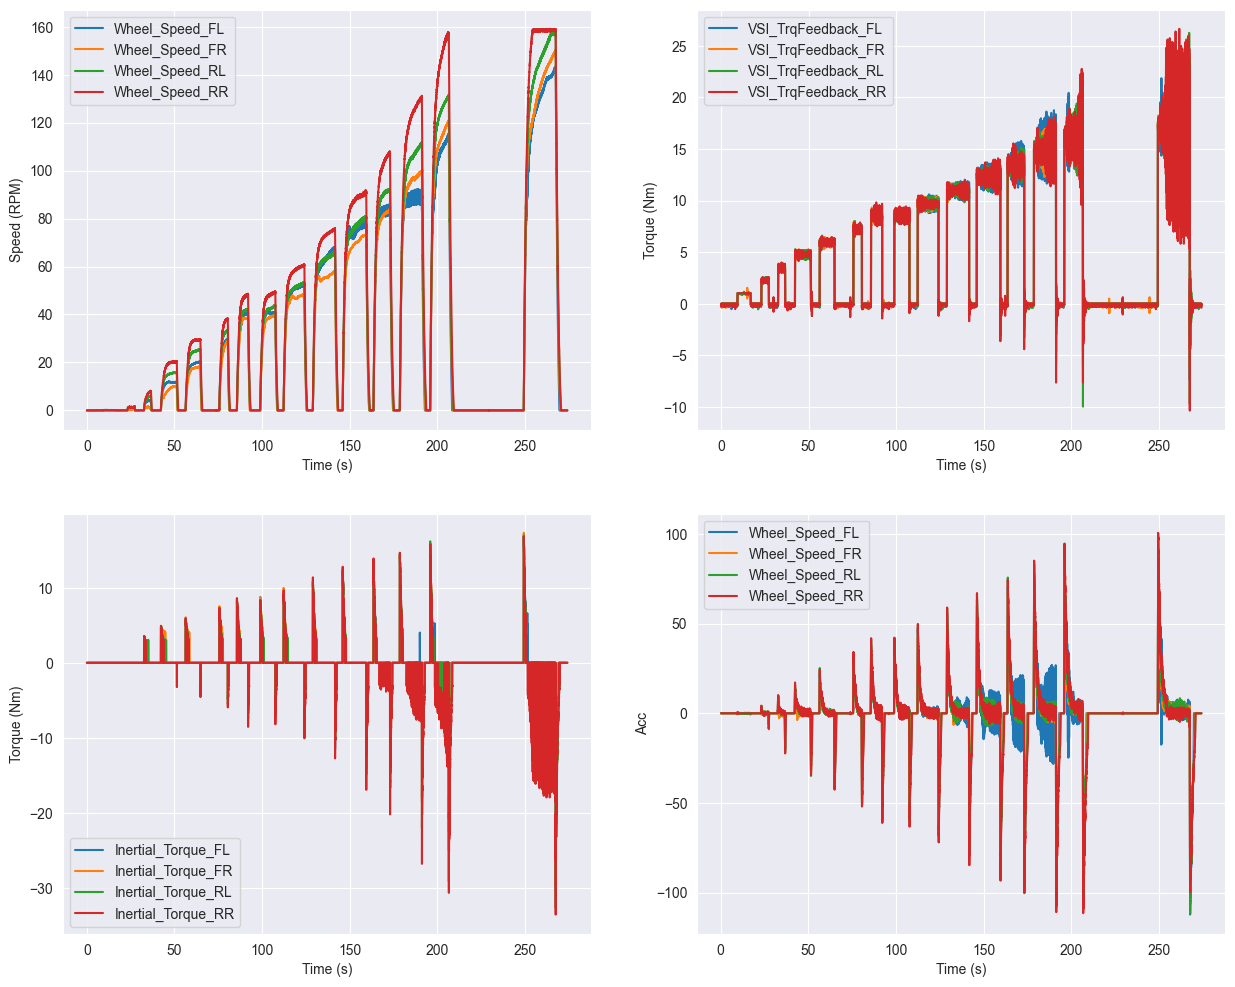

In [377]:
# Plot the step torque command data
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
step_torque_cmd[speed_names].plot(ax=ax[0, 0], xlabel='Time (s)', ylabel='Speed (RPM)')
step_torque_cmd[torque_names].plot(ax=ax[0, 1], xlabel='Time (s)', ylabel='Torque (Nm)')

# Remove theoretical torque from real torque data
for i, wheel in enumerate(wheel_names):
    kd = kd_front if wheel[0] == 'F' else kd_rear
    ks = ks_front if wheel[0] == 'F' else ks_rear
    step_torque_cmd[f'Inertial_Torque_{wheel}'] = (step_torque_cmd[torque_names[i]] - step_torque_cmd[speed_names[i]] * kd).apply(lambda x:0 if abs(x) < ks else x)
    
# Plot Inertial Torque
step_torque_cmd[[f'Inertial_Torque_{wheel}' for wheel in wheel_names]].plot(xlabel='Time (s)', ylabel='Torque (Nm)', ax=ax[1, 0])

diff_size = 20
diff_speed = step_torque_cmd[speed_names].diff(diff_size) * (1 / (diff_size * 0.01))
diff_speed.plot(xlabel='Time (s)', ylabel='Acc', ax=ax[1, 1])
plt.show()

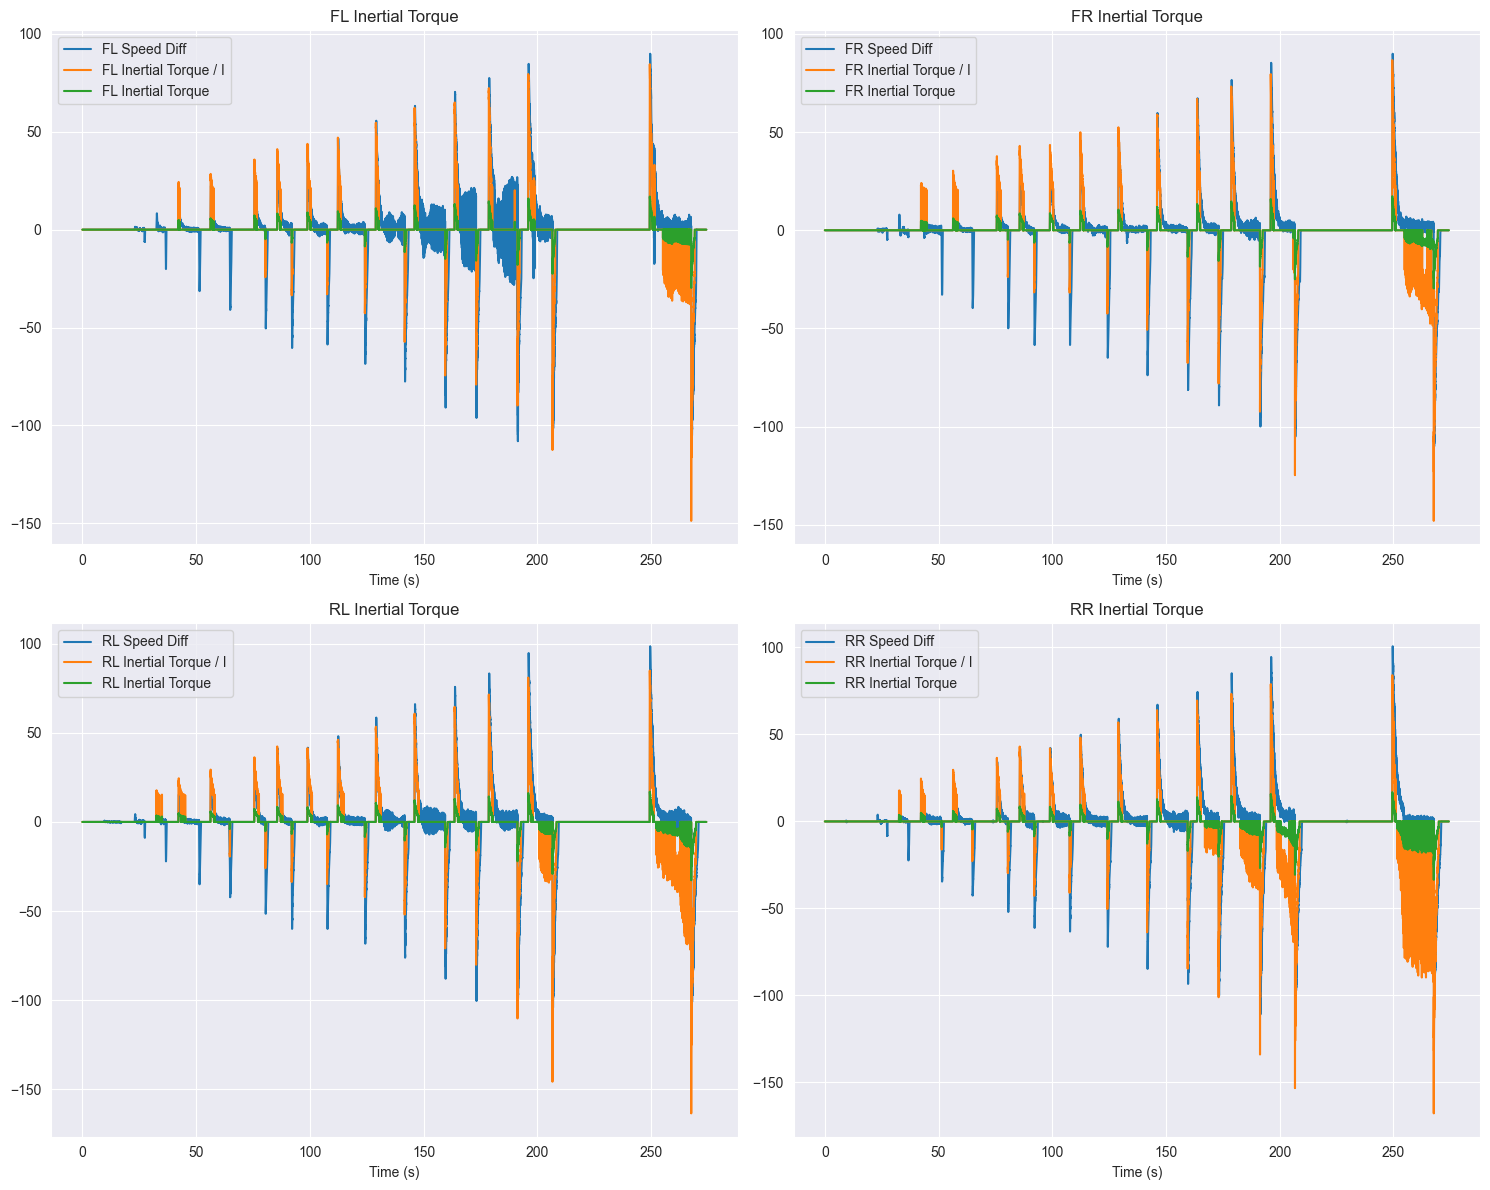

In [378]:
# Plot Inertial Torque for each wheel

I = 0.2

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
for i, wheel in enumerate(wheel_names):
    ax[i//2, i%2].plot(diff_speed[speed_names[i]], label=f'{wheel} Speed Diff')
    ax[i//2, i%2].plot(step_torque_cmd[f'Inertial_Torque_{wheel}'] / I, label=f'{wheel} Inertial Torque / I')
    ax[i//2, i%2].plot(step_torque_cmd[f'Inertial_Torque_{wheel}'], label=f'{wheel} Inertial Torque')
    ax[i//2, i%2].set_xlabel('Time (s)')
    ax[i//2, i%2].set_title(f'{wheel} Inertial Torque')
    ax[i//2, i%2].legend()
plt.tight_layout()
plt.show()

In [379]:
inertia_names = [f'Inertia_{wheel}' for wheel in wheel_names]

# Calculate the inertia
for i, wheel in enumerate(wheel_names):
    step_torque_cmd[inertia_names[i]] = step_torque_cmd[f'Inertial_Torque_{wheel}'] / diff_speed[speed_names[i]]
    step_torque_cmd[inertia_names[i]].fillna(0, inplace=True)   
    
    
# Plot the inertia vs torque using plotly
import plotly.express as px
for i, wheel in enumerate(wheel_names):
    fig = px.scatter(step_torque_cmd, x=torque_names[i], y=inertia_names[i], title=f'{wheel} Inertia vs Torque')
    fig.show()    

# Plot speed diff vs torque
fig = px.scatter(step_torque_cmd, x=torque_names[0], y=diff_speed[speed_names[0]], title='Speed Diff vs Torque')
fig.show()

In [380]:
# Filter the inertia data
inertia = step_torque_cmd[inertia_names]

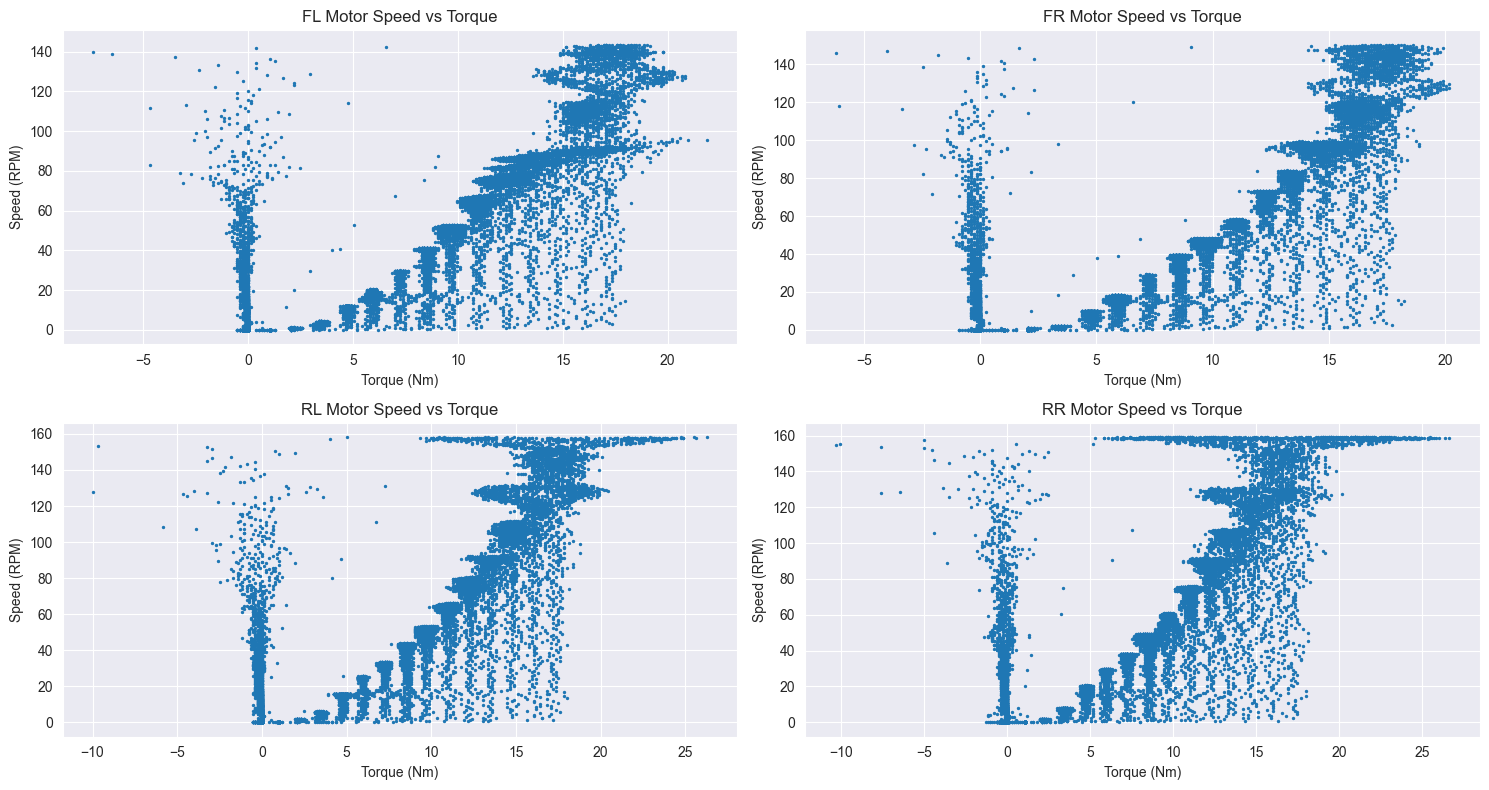

In [381]:
# For each wheel, plot the motor speed vs torque
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, wheel in enumerate(wheel_names):
    ax[i//2, i%2].scatter(step_torque_cmd[torque_names[i]], step_torque_cmd[speed_names[i]], s=2)
    ax[i//2, i%2].set_xlabel('Torque (Nm)')
    ax[i//2, i%2].set_ylabel('Speed (RPM)')
    ax[i//2, i%2].set_title(f'{wheel} Motor Speed vs Torque')
plt.tight_layout()
plt.show()

In [382]:
# Create Dataframes per wheel
wheel_data = {}
for i, wheel in enumerate(wheel_names):
    wheel_data[wheel] = step_torque_cmd[[torque_names[i], speed_names[i], inertia_names[i]]].copy()
    wheel_data[wheel].columns = ['Torque', 'Speed', 'Inertia']

FL Inertia
count    9562.000000
mean       -0.047944
std         4.441245
min      -163.754608
25%         0.000000
50%        -0.000000
75%         0.000000
max       174.931337
Name: Inertia, dtype: float64
FR Inertia
count    9753.000000
mean       -0.114067
std         6.420017
min      -219.203823
25%         0.000000
50%         0.000000
75%         0.000000
max       232.829037
Name: Inertia, dtype: float64
RL Inertia
count    9530.000000
mean       -0.193865
std         7.683483
min      -310.963110
25%         0.000000
50%         0.000000
75%         0.000000
max       307.840624
Name: Inertia, dtype: float64
RR Inertia
count    9545.000000
mean       -0.211406
std        15.674535
min      -352.285539
25%         0.000000
50%         0.000000
75%         0.000000
max       290.056924
Name: Inertia, dtype: float64


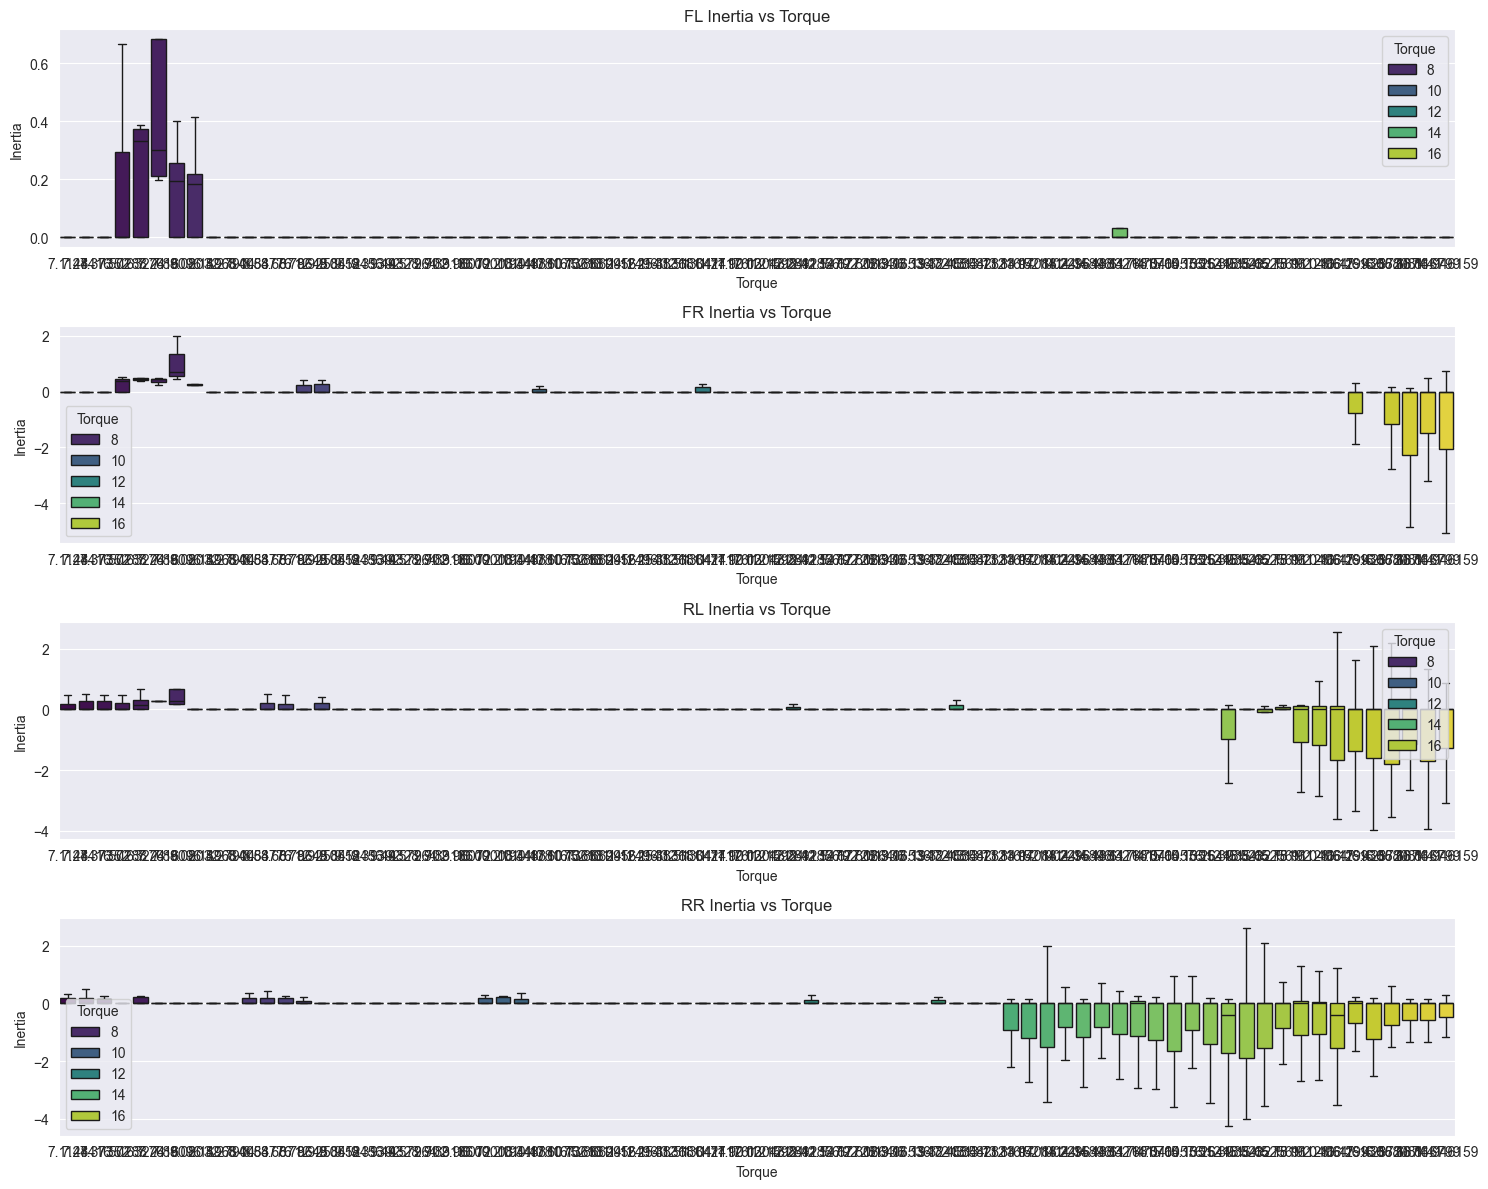

In [383]:
import seaborn as sns

fig, ax = plt.subplots(4, 1, figsize=(15, 12))
for i, wheel in enumerate(wheel_names):
    test_data = wheel_data[wheel]
    # Remove inf values
    test_data = test_data.replace([np.inf, -np.inf], np.nan)
    test_data = test_data.dropna()
    test_data = test_data[test_data['Torque'].apply(lambda x: 7.0 < x < 17.0)]
    
    # With seaborn plot box plots
    ax[i].set_title(f'{wheel} Inertia vs Torque')
    sns.boxplot(data=test_data, x='Torque', y='Inertia', ax=ax[i], hue='Torque', palette='viridis', showfliers=False)
    
    print(f'{wheel} Inertia')
    print(test_data['Inertia'].describe())
    
plt.tight_layout()
plt.show()

count    38390.000000
mean        -0.141608
std          9.545842
min       -352.285539
25%          0.000000
50%          0.000000
75%         -0.000000
max        307.840624
Name: Inertia, dtype: float64

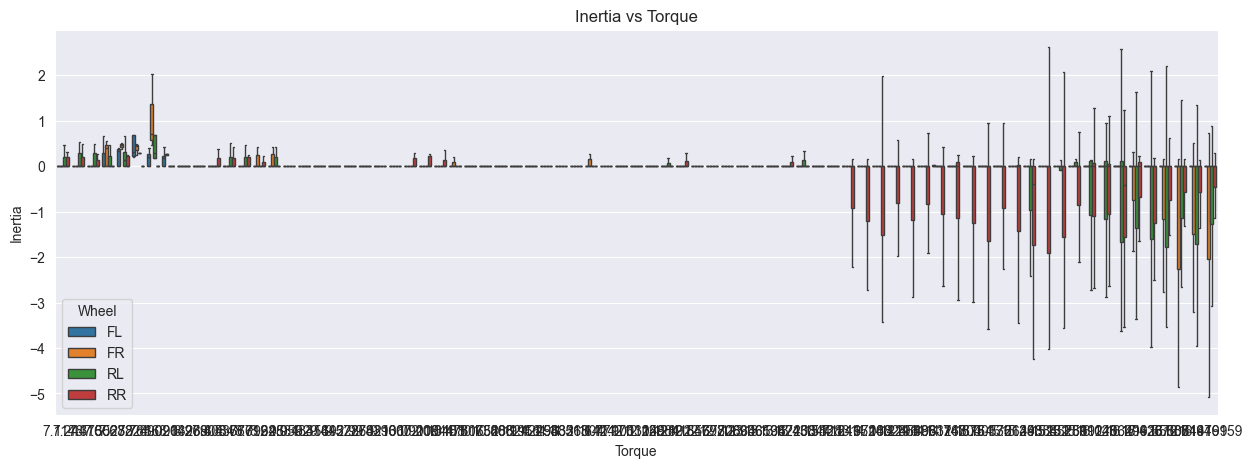

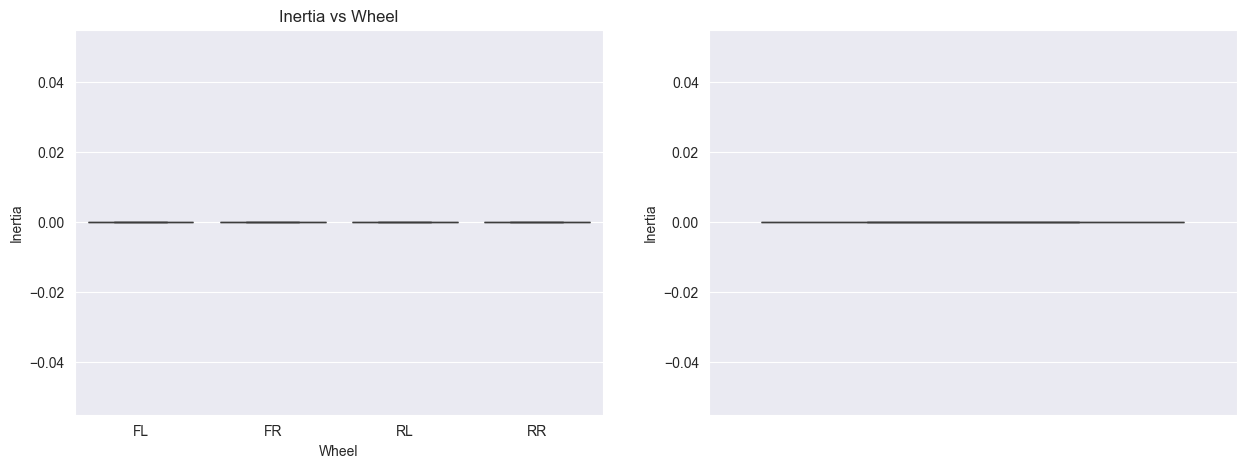

In [384]:
# Merge all the wheel dataframe and add a column for the wheel
all_data = pd.concat(wheel_data.values())
all_data['Wheel'] = [wheel for wheel in wheel_names for _ in range(len(step_torque_cmd))]
all_data = all_data.replace([np.inf, -np.inf], np.nan)
all_data = all_data.dropna()
all_data = all_data[all_data['Torque'].apply(lambda x: 7.0 < x < 17.0)]
all_data.head()

# With seaborn plot box plots
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=all_data, x='Torque', y='Inertia', hue='Wheel', ax=ax, showfliers=False)
ax.title.set_text('Inertia vs Torque')


fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=all_data, x='Wheel', y='Inertia', ax=ax[0], hue='Wheel', showfliers=False)
ax[0].title.set_text('Inertia vs Wheel')

sns.boxplot(data=all_data, y='Inertia', ax=ax[1], showfliers=False)
all_data['Inertia'].describe()